# Simulace aproximací pravděpodobnostních rozdělení
Tento notebook obsahuje simulace základních aproximací pravděpoodobnostních rozdělení pro kurz Základy teorie pravděpodobnosti a matematické statistiky.

## Hypergeometrické rozdělení
Hypergeometrické rozdělení nám reprezentuje pravděpodobnost *p(x)*, že při výběru *n* prvků z množiny o velikosti *N* s *A* prvky dané vlastnosti, vybereme právě daných *n* prvků bude mít danou vlastnost.

### Aproximace hypergeometrického rozdělení
Dané rozdělení můžeme aproximovat pomocí Binomického rozdělení pro hodnoty *n/N < 0.1*. V daném případě konverguje hypergeometrické rozdělení k binomickému v distribuci.

## Definice hypergeometrického rozdělení
Pro přípustné hodnoty vypočteme hypergeometrické rozdělení pomocí vzorce:
$$P(X = x) = \frac{\binom{A}{x} \binom{N - A}{n - x}}{\binom{N}{n}}$$

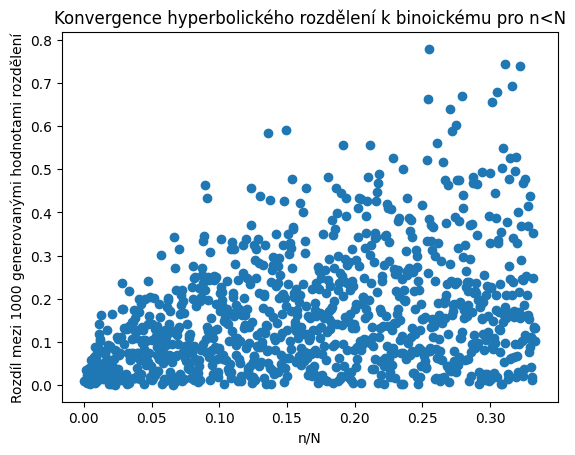

Pearsonův korelační koeficient: PearsonRResult(statistic=0.35438156867835885, pvalue=5.842281716802725e-31)
Spearmanův korelační koeficient: SignificanceResult(statistic=0.3472475962874286, pvalue=1.0286501594998837e-29)
Kendall-tau korelační koeficient: SignificanceResult(statistic=0.23932212039151457, pvalue=1.0911695409525102e-29)


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

iterations = 1000

#Vybírané prvky
n = iterations
#Velikost množiny
N = iterations * 3
#Počet prvků s danou vlastností
A = 150

#Values for the x axis representing difference between binomial and hypergeometric distribution
x_values = []

#Y values do represent the n/N ratio. Our simulation goal is to show, that smaller this value is, closer they are
y_values = []

for i in range(iterations):
  #Pravdepodobnost pro binomické rozdělení
  p = A/N
  y_values.append(n/N)
  # Vygenerujeme 1000 hodnot hypergeometrického rozdělení
  binomial = np.random.binomial(n, p, size=iterations)

  # Nyní vygenerujeme 1000 hodnot binomického rozdělení
  rv = hypergeom.rvs(N, A, n, size = iterations)

  # Nyní určíme jejich průměrnou odchylku
  diff = abs(np.sum(binomial - rv) / iterations)
  x_values.append(diff)

  n = n - 1

plt.title("Konvergence hyperbolického rozdělení k binoickému pro n<N")
plt.xlabel("n/N")
plt.ylabel("Rozdíl mezi 1000 generovanými hodnotami rozdělení")
plt.scatter(y_values,x_values)
plt.show()

#Zkusíme testy korelace mezi nižším n/N a nižším rozdílem hodnot
print("Pearsonův korelační koeficient: " + str(pearsonr(y_values, x_values)))
print("Spearmanův korelační koeficient: " + str(spearmanr(y_values, x_values)))
print("Kendall-tau korelační koeficient: " + str(kendalltau(y_values, x_values)))


